# K Nearest Neighbours

Objective: Predict transfusion donater     
Dataset: transfusion.data    
Ref: NA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('transfusion.data')
print(data.shape)
data.head()

(748, 5)


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [2]:
col_name = ['recency','frequency','ccblood','time','donate']
data.columns = col_name
data.head()

,recency,frequency,ccblood,time,donate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## Data Exploration

0    570
1    178
Name: donate, dtype: int64


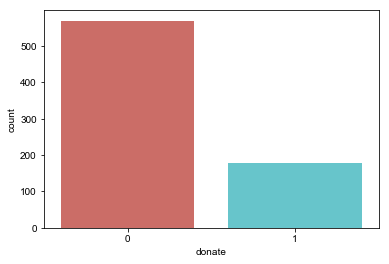

In [3]:
print(data['donate'].value_counts())

sns.countplot(x='donate',data = data, palette='hls',order = data['donate'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Correlation

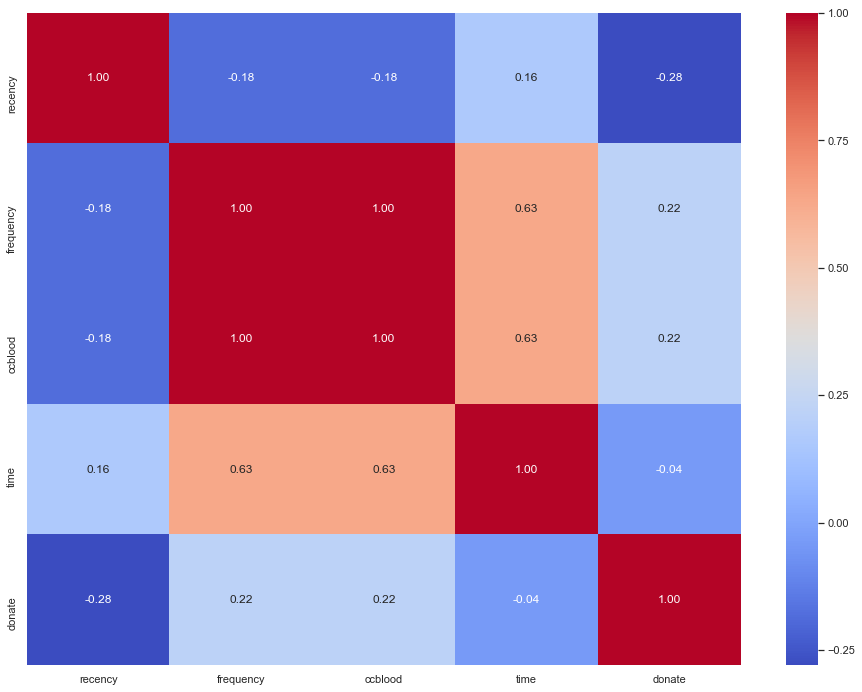

In [4]:
import seaborn as sns
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [5]:
corr_rank = data.corr()
corr_rank["donate"].sort_values(ascending=False)

donate       1.000000
frequency    0.218633
ccblood      0.218633
time        -0.035854
recency     -0.279869
Name: donate, dtype: float64

## Data Processing and Selection

In [6]:
X = np.asarray(data[['recency','frequency','ccblood','time']])
print(X.shape)
X[0:5]

(748, 4)


array([[    2,    50, 12500,    98],
       [    0,    13,  3250,    28],
       [    1,    16,  4000,    35],
       [    2,    20,  5000,    45],
       [    1,    24,  6000,    77]], dtype=int64)

In [7]:
y = np.asarray(data['donate'])
print(y.shape)
y[0:5]

(748,)


array([1, 1, 1, 1, 0], dtype=int64)

## Data Standardization

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (748, 4)


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.92789873,  7.62334626,  7.62334626,  2.61563344],
       [-1.17511806,  1.28273826,  1.28273826, -0.2578809 ]])

## Split Train Test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (598, 4) (598,)
X TEST Set :  (150, 4) (150,)


## K Nearest Neighbour

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#using loop to find the best accuracy and the best k
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    neighf = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neighf.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(np.round(mean_acc,4))

[0.7133 0.7733 0.7867 0.76   0.78   0.76   0.7867 0.76   0.78  ]


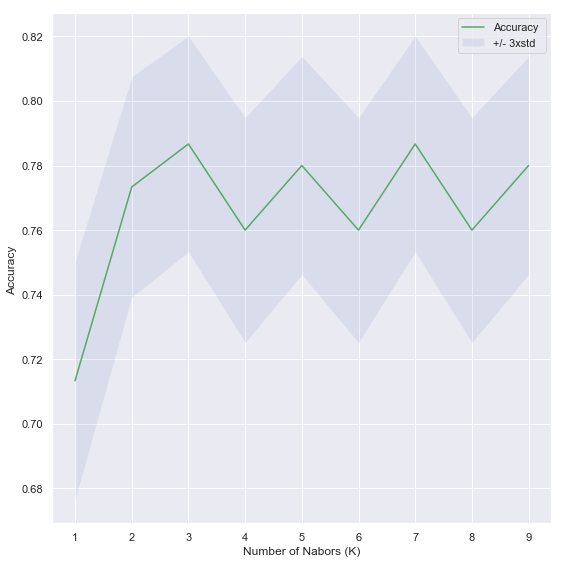

The best accuracy was 0.7867 with k= 3


In [11]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was", round(mean_acc.max(),4), "with k=", mean_acc.argmax()+1) 

In [12]:
k = 3
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

print("Train set Accuracy: ", round(metrics.accuracy_score(y_train, neigh.predict(X_train)),4))
print("Test set Accuracy : ", round(metrics.accuracy_score(y_test, yhat),4))

Train set Accuracy:  0.8361
Test set Accuracy :  0.7867


## Test Prediction

In [13]:
df_pred1 = data[data.index == 3]
df_pred2 = data[data.index == 4]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,recency,frequency,ccblood,time,donate
3,2,20,5000,45,1
4,1,24,6000,77,0


In [14]:
Xp = df_pred.iloc[:, :-1]
Xp = scaler.transform(Xp)

yp = df_pred["donate"]

pred = neigh.predict(Xp)
pred

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


array([1, 0], dtype=int64)